# Use this notebook for Homework 5 - Clustering

In this homework 3 noisy point clouds are generated and afterwards clusterd by the k-means algorithm. Your task is to complete the k-means algorithm.  

## Dont touch anything in the next cell

(600, 2)
Initial Centroids
[[0. 8.]
 [5. 4.]
 [5. 8.]]


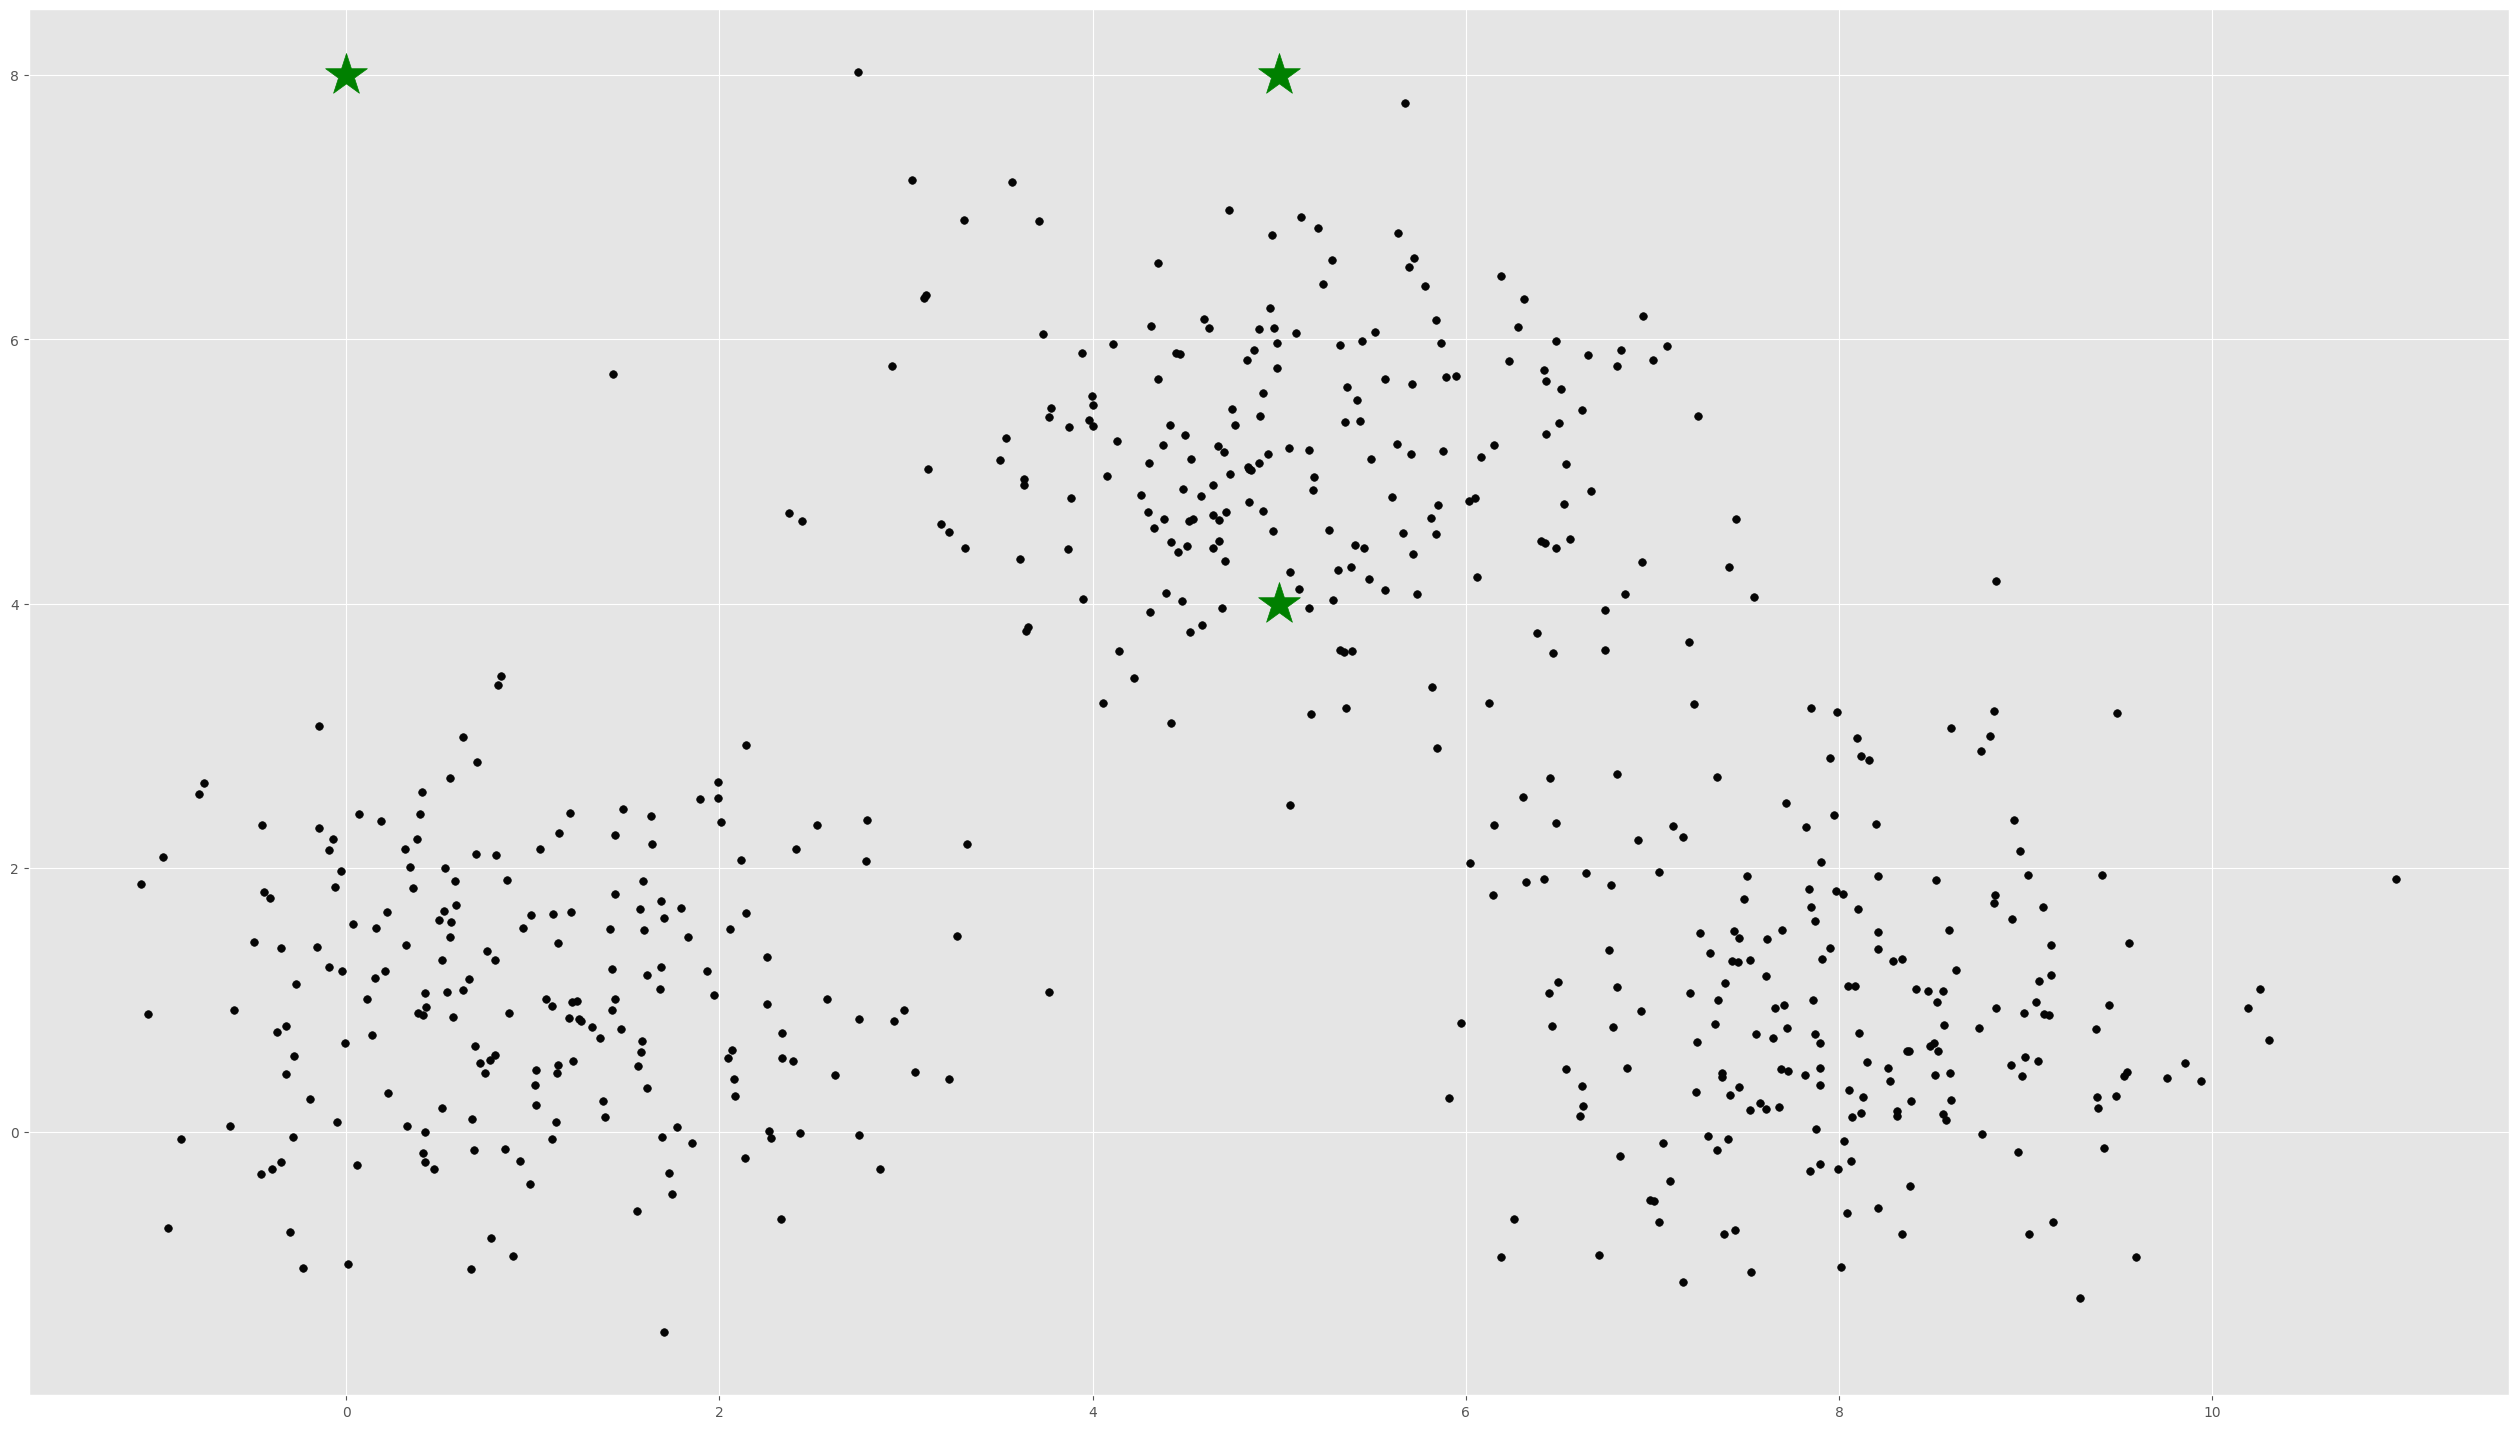

In [9]:
from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (32, 18)
plt.style.use('ggplot')



# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])


# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3



data = np.concatenate((data_1, data_2, data_3), axis = 0)
print(data.shape)


# Getting the values and plotting it
f1 = data[:,0]
f2 = data[:,1]

X = np.array(list(zip(f1, f2)))

# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

#Plotting along with the Initial Centroids
plt.scatter(f1, f2, c='#050505', s=30)
plt.scatter(C_x, C_y, marker='*', s=1000, c='g')

# Now comes the k-means alogrithm
## The exit condition is missing...
## Try complete the code and get it running
### If you need help, have a look at the possible solutions in Task 14 of the homework

## Only Edit where it is marked with comments

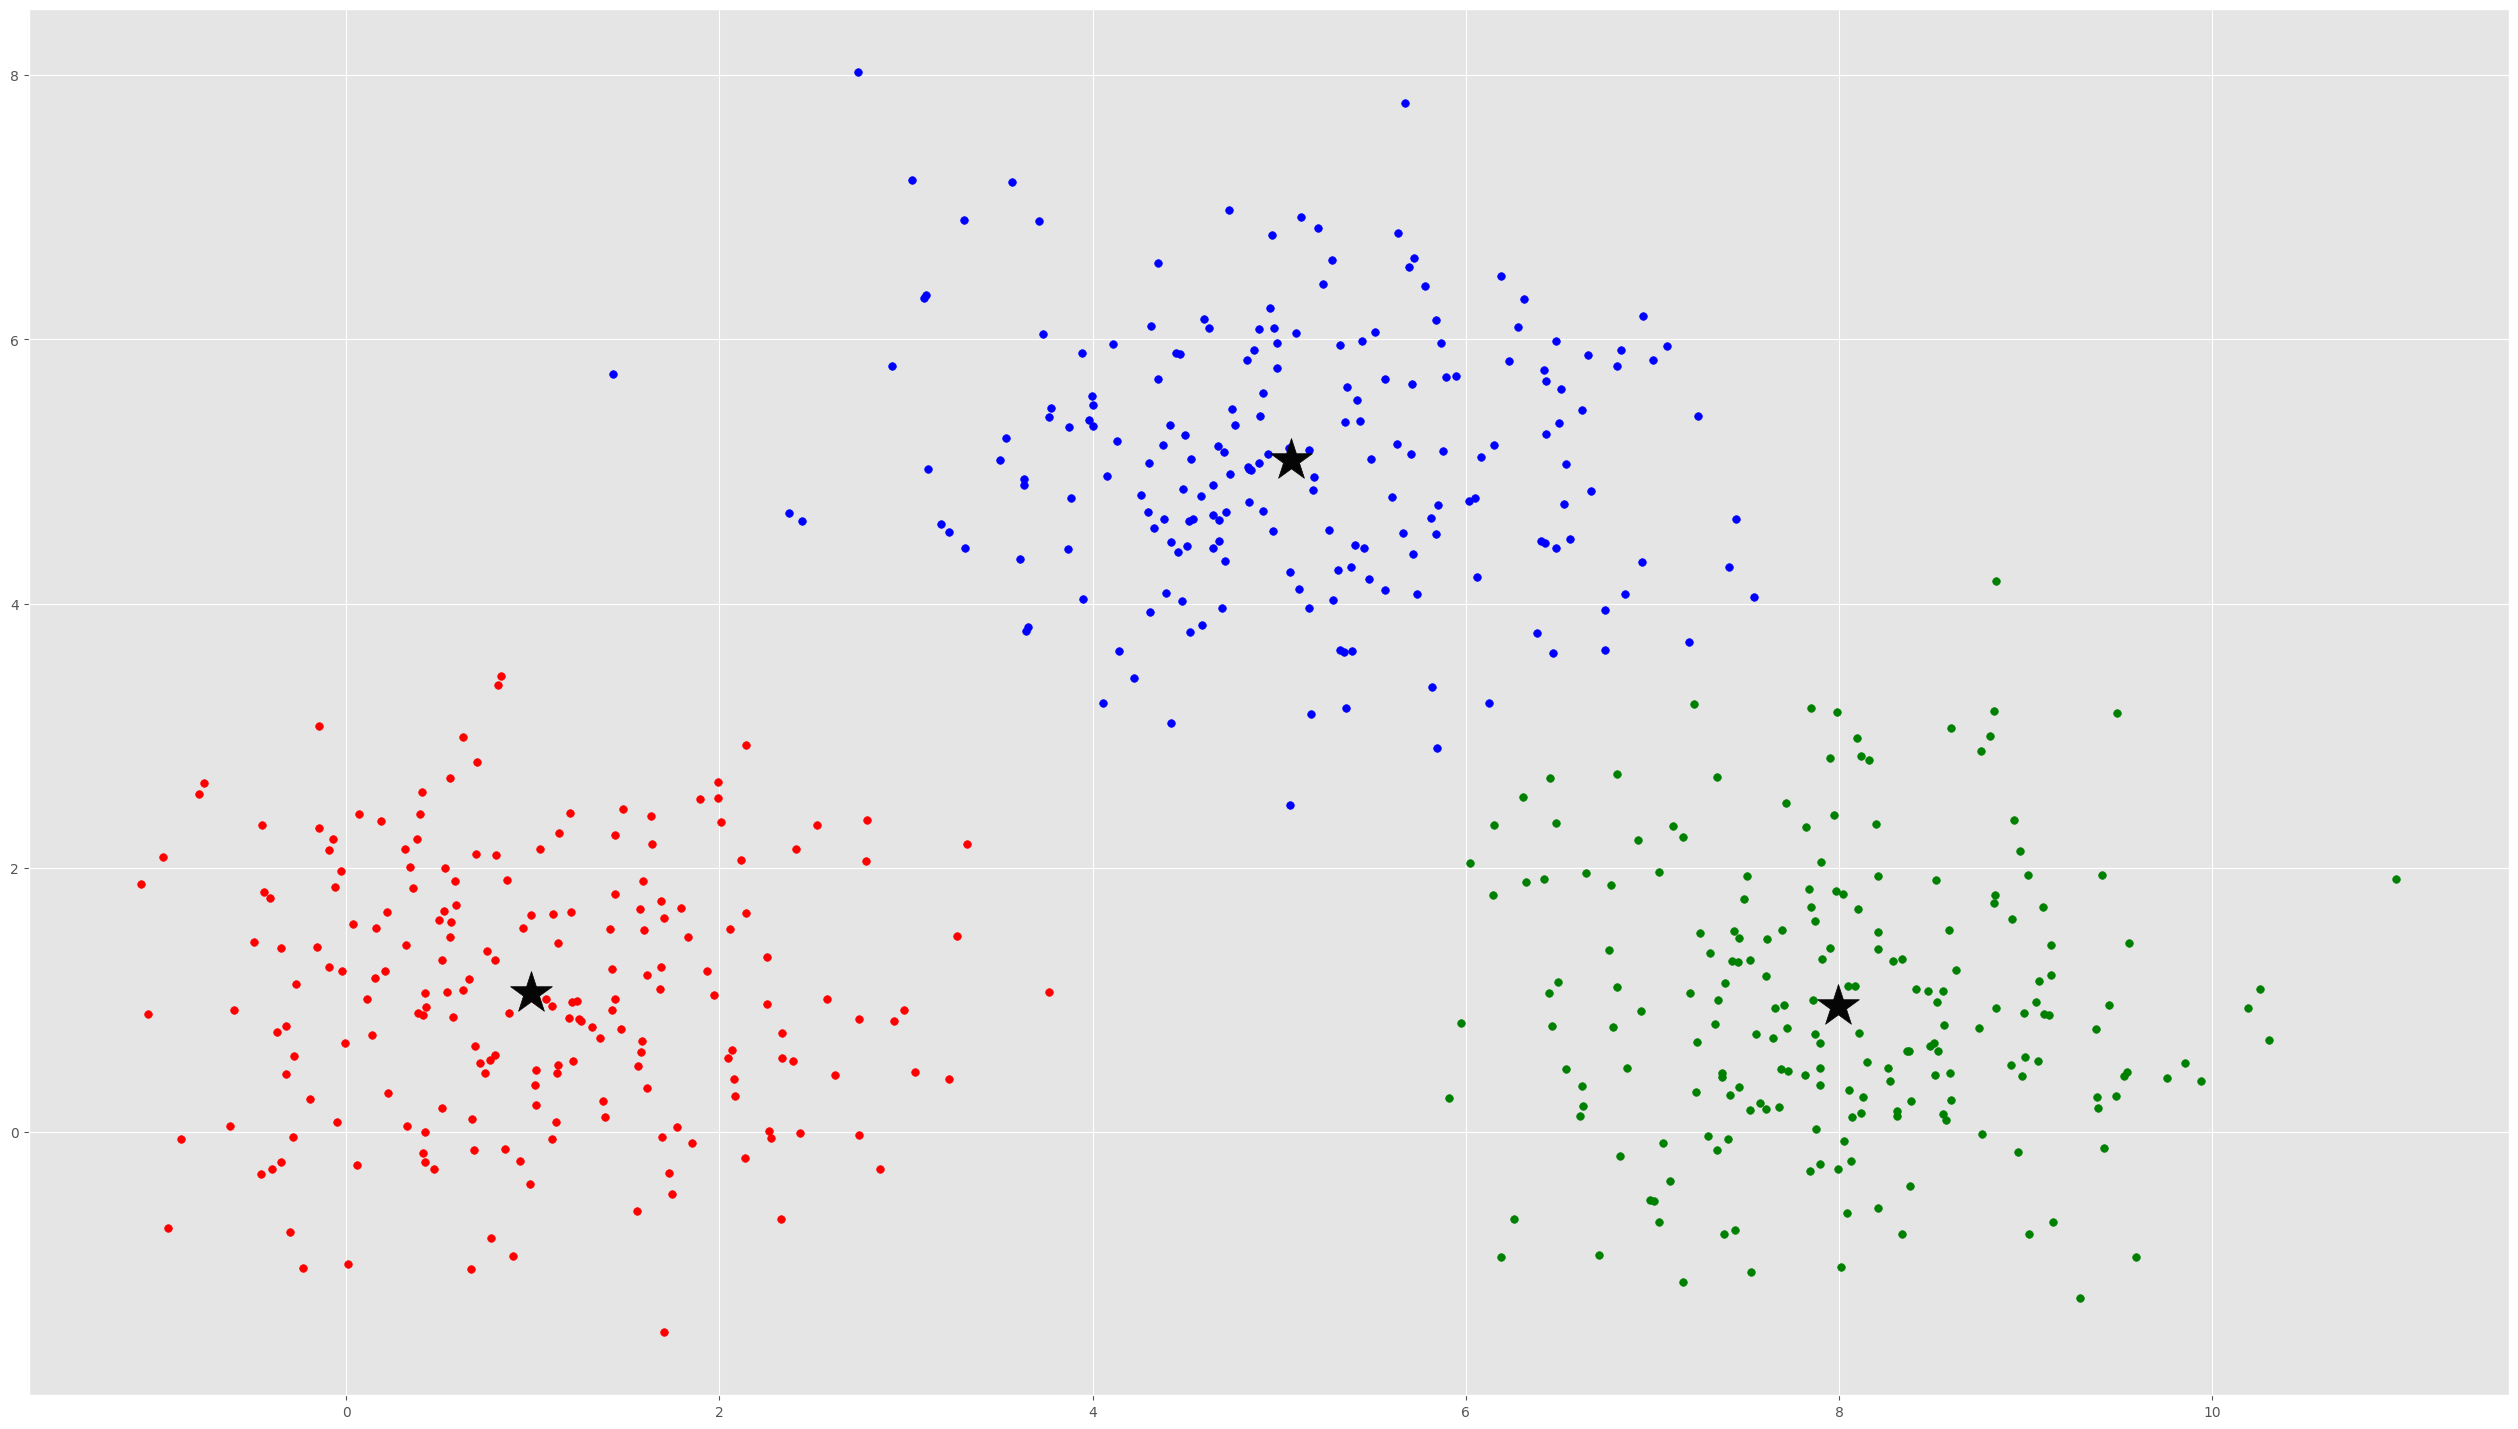

In [10]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
# Some part is msssing...
error = dist(C, C_old, None)

# Loop will run till ... what is the end condition?
while error != 0: # maybe error.all() != 0
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    # You probably need to update something...
    error = dist(C, C_old, None)


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=30, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=1000, c='#050505')